In [1]:
!git clone https://github.com/fastai/course-v3.git

fatal: destination path 'course-v3' already exists and is not an empty directory.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fastai
from pathlib import Path
import os
from fastai.vision import *
from fastai.metrics import error_rate
%matplotlib inline

In [3]:
path = Path('/home/ec2-user/SageMaker')
dataset = path/'dataset'
print(dataset)
!cd dataset && dir

/home/ec2-user/SageMaker/dataset
sample_submission.csv  test.csv  test_images  train.csv  train_images


In [4]:
df_train = pd.read_csv(dataset/'train.csv')

In [5]:
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [7]:
path_img = dataset/'train_images'
path_img

PosixPath('/home/ec2-user/SageMaker/dataset/train_images')

In [12]:
tfms = get_transforms(do_flip=False)

In [26]:
data = ImageDataBunch.from_csv(path_img, suffix='.png',ds_tfms=tfms,bs=20, size=224)

[0, 1, 2, 3, 4]

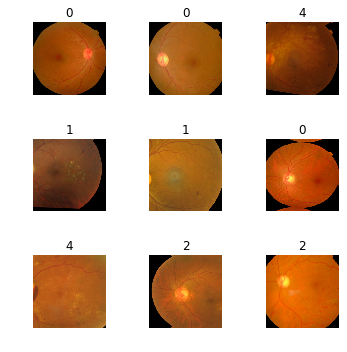

In [27]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [28]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: DataLoader worker (pid 11935) is killed by signal: Killed. 

In [19]:
# learn.save('stage-1')

In [ ]:
learn.save('stage-2')

# RESULTS

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))